# <center>Data Science and Business Analytics
## <center>Task-4 : Exploratory Data Analysis - Terrorism
### Name : Selvan Kumar M

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.simplefilter('ignore')

In [2]:
import plotly_express as px

from plotly.offline import iplot
import plotly as py
import plotly.tools as tls
import cufflinks as cf
py.offline.init_notebook_mode(connected=True)
cf.go_offline()

## Load & Read Dataset

In [3]:
data = pd.read_csv('globalterrorismdb_0718dist.csv', encoding='latin1')

In [4]:
data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [5]:
data.shape

(181691, 135)

### Selecting the columns with useful information for further analysis.

In [6]:
copy_data = data.copy()  #this copy_data is created to make a copy of original data

data = data[['iyear','imonth','iday','country_txt','region_txt','provstate','city',
            'success','suicide','nwound','nkill','attacktype1_txt','targtype1_txt',
             'gname','natlty1_txt','weaptype1_txt']]

In [7]:
data.head()

,iyear,imonth,iday,country_txt,region_txt,provstate,city,success,suicide,nwound,nkill,attacktype1_txt,targtype1_txt,gname,natlty1_txt,weaptype1_txt
0,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,1,0,0.0,1.0,Assassination,Private Citizens & Property,MANO-D,Dominican Republic,Unknown
1,1970,0,0,Mexico,North America,Federal,Mexico city,1,0,0.0,0.0,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,Belgium,Unknown
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,1,0,0.0,1.0,Assassination,Journalists & Media,Unknown,United States,Unknown
3,1970,1,0,Greece,Western Europe,Attica,Athens,1,0,NaN,NaN,Bombing/Explosion,Government (Diplomatic),Unknown,United States,Explosives
4,1970,1,0,Japan,East Asia,Fukouka,Fukouka,1,0,NaN,NaN,Facility/Infrastructure Attack,Government (Diplomatic),Unknown,United States,Incendiary


### Renaming columns

In [8]:
data.rename(columns={'iyear':'year','imonth':'month','iday':'day','country_txt':'country','region_txt':'region',
                     'provstate':'state','nwound':'wound','nkill':'kill','attacktype1_txt':'attack',
                     'targtype1_txt':'target','gname':'group','natlty1_txt':'nationality','weaptype1_txt':'weapon'
                    },inplace=True)
data.head()

,year,month,day,country,region,state,city,success,suicide,wound,kill,attack,target,group,nationality,weapon
0,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,1,0,0.0,1.0,Assassination,Private Citizens & Property,MANO-D,Dominican Republic,Unknown
1,1970,0,0,Mexico,North America,Federal,Mexico city,1,0,0.0,0.0,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,Belgium,Unknown
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,1,0,0.0,1.0,Assassination,Journalists & Media,Unknown,United States,Unknown
3,1970,1,0,Greece,Western Europe,Attica,Athens,1,0,NaN,NaN,Bombing/Explosion,Government (Diplomatic),Unknown,United States,Explosives
4,1970,1,0,Japan,East Asia,Fukouka,Fukouka,1,0,NaN,NaN,Facility/Infrastructure Attack,Government (Diplomatic),Unknown,United States,Incendiary


In [9]:
#Finding percentage of null values.
data.isnull().sum()/len(data)*100

year           0.000000
month          0.000000
day            0.000000
country        0.000000
region         0.000000
state          0.231712
city           0.238867
success        0.000000
suicide        0.000000
wound          8.977330
kill           5.676120
attack         0.000000
target         0.000000
group          0.000000
nationality    0.858050
weapon         0.000000
dtype: float64

### Filling the null values

In [10]:
#Filling the null values with respective values.
data.kill.fillna(data.kill.mode()[0],inplace=True)
data.wound.fillna(data.wound.mode()[0],inplace=True)

In [11]:
data.isnull().sum()/len(data)*100

year           0.000000
month          0.000000
day            0.000000
country        0.000000
region         0.000000
state          0.231712
city           0.238867
success        0.000000
suicide        0.000000
wound          0.000000
kill           0.000000
attack         0.000000
target         0.000000
group          0.000000
nationality    0.858050
weapon         0.000000
dtype: float64

In [12]:
data.dropna(inplace=True)

### changing the years into decade

In [13]:
data['decade'] = pd.cut(data['year'], bins=[1969, 1980, 1990, 2000, 2010, 2020],
                        labels=['1970-1980', '1980-1990', '1990-2000', '2000-2010', '2010-2017'])

## Terrorism in India

In [14]:
# data of terrorism attack happend in India
india = data[data['country']=='India']
india.head()

,year,month,day,country,region,state,city,success,suicide,wound,kill,attack,target,group,nationality,weapon,decade
1186,1972,2,22,India,South Asia,Delhi,New Delhi,1,0,0.0,0.0,Hijacking,Airports & Aircraft,Palestinians,Germany,Explosives,1970-1980
2764,1975,1,2,India,South Asia,Bihar,Samastipur,1,0,0.0,4.0,Bombing/Explosion,Government (General),Ananda Marga,India,Explosives,1970-1980
3857,1976,5,26,India,South Asia,Delhi,New Delhi,1,0,0.0,0.0,Bombing/Explosion,Airports & Aircraft,Unknown,India,Explosives,1970-1980
5327,1977,9,28,India,South Asia,Maharashtra,Bombay,1,0,0.0,0.0,Hijacking,Airports & Aircraft,Japanese Red Army (JRA),Japan,Firearms,1970-1980
7337,1979,1,13,India,South Asia,Assam,Unknown,1,0,0.0,0.0,Armed Assault,Police,Naga People,India,Firearms,1970-1980


In [15]:
# Total number of Terrorsim attacks in India
vc = india.value_counts().sum()
print('Total number of Terrorsim attacks in India is', vc)

Total number of Terrorsim attacks in India is 11934


In [16]:
# States in India.
india.state.unique()

array(['Delhi', 'Bihar', 'Maharashtra', 'Assam', 'Manipur', 'Mizoram',
       'Andhra Pradesh', 'Unknown', 'Jharkhand', 'Tamil Nadu',
       'Uttar Pradesh', 'West Bengal', 'Nagaland', 'Gujarat',
       'Chandigarh', 'Rajasthan', 'Punjab', 'Chhattisgarh', 'Tripura',
       'Haryana', 'Jammu and Kashmir', 'Himachal Pradesh', 'Karnataka',
       'Uttaranchal', 'Madhya Pradesh', 'Orissa', 'Kerala', 'Odisha',
       'Meghalaya', 'Sikkim', 'Goa', 'Andhra pradesh',
       'Arunachal Pradesh', 'Puducherry', 'Telangana'], dtype=object)

In [17]:
# State with maximun number of attack record.
mx=india.state.max()
print(mx, 'is the state with maximum number of terrorsim attack in India.')

West Bengal is the state with maximum number of terrorsim attack in India.


In [18]:
# State with maximun number of attack record.
mn=india.state.min()
print(mn, 'is the state with minimum number of terrorsim attack in India.')

Andhra Pradesh is the state with minimum number of terrorsim attack in India.


In [19]:
ikill=india.kill.sum()
print(ikill,'people were killed in India')

19232.0 people were killed in India


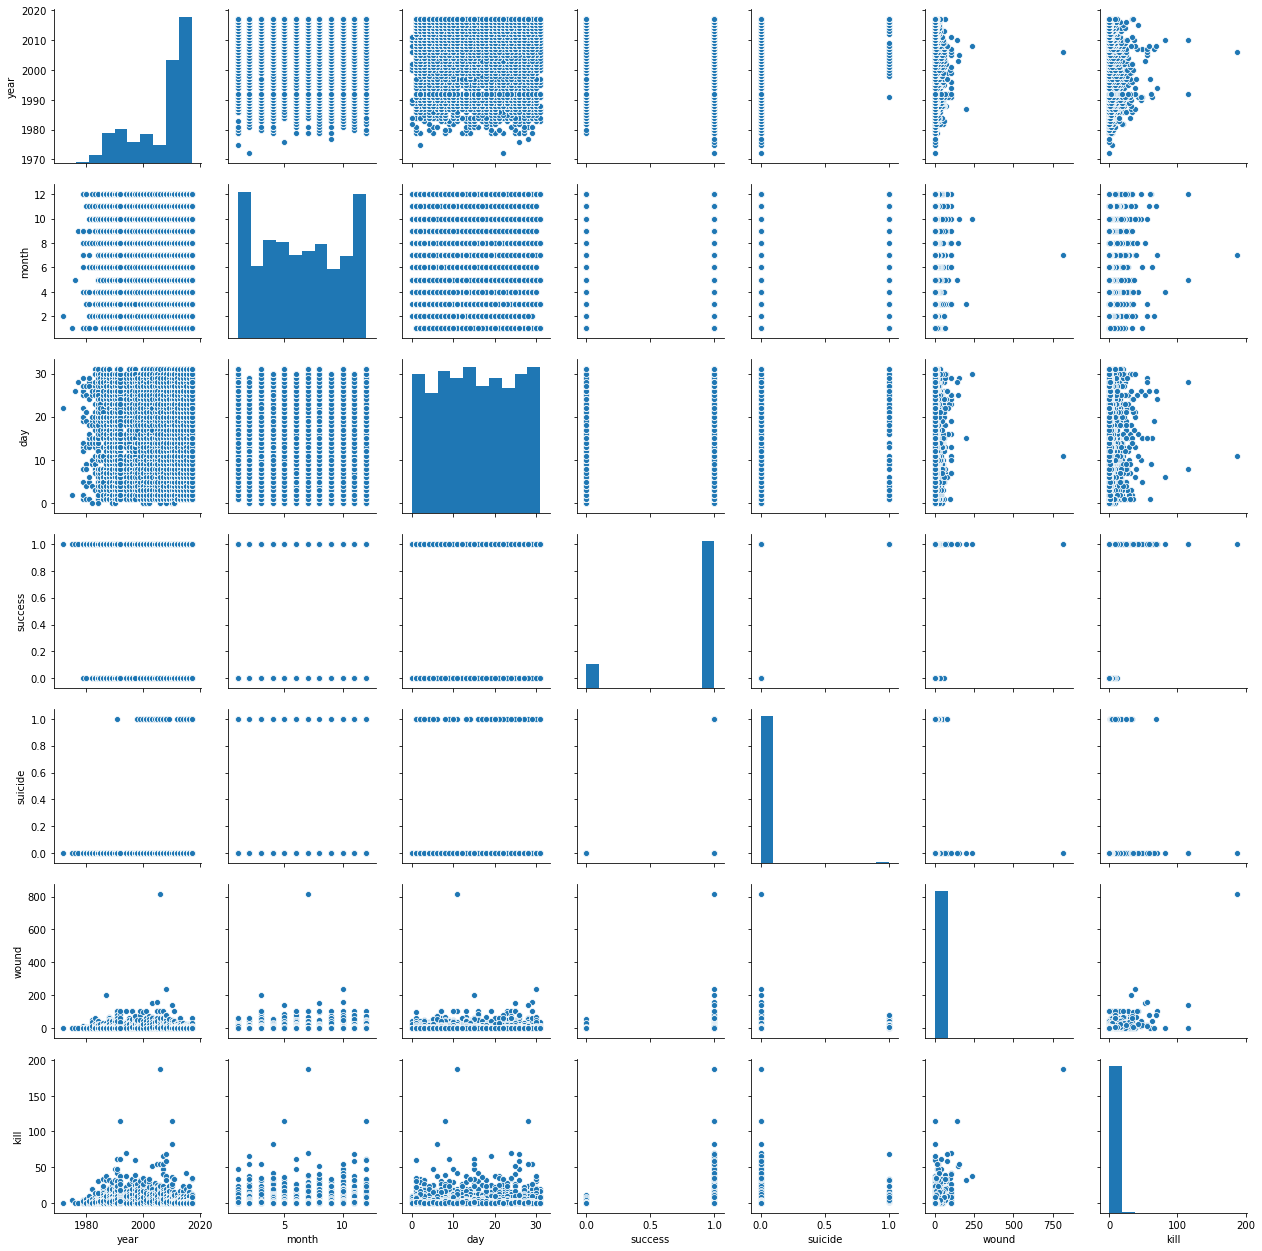

In [20]:
sns.pairplot(india);

In [21]:
px.scatter_matrix(india, title='Terrorism record in India',dimensions=["year", "success", "wound", "kill"],color='state')

## Visuvalization

### Year with higher attacks

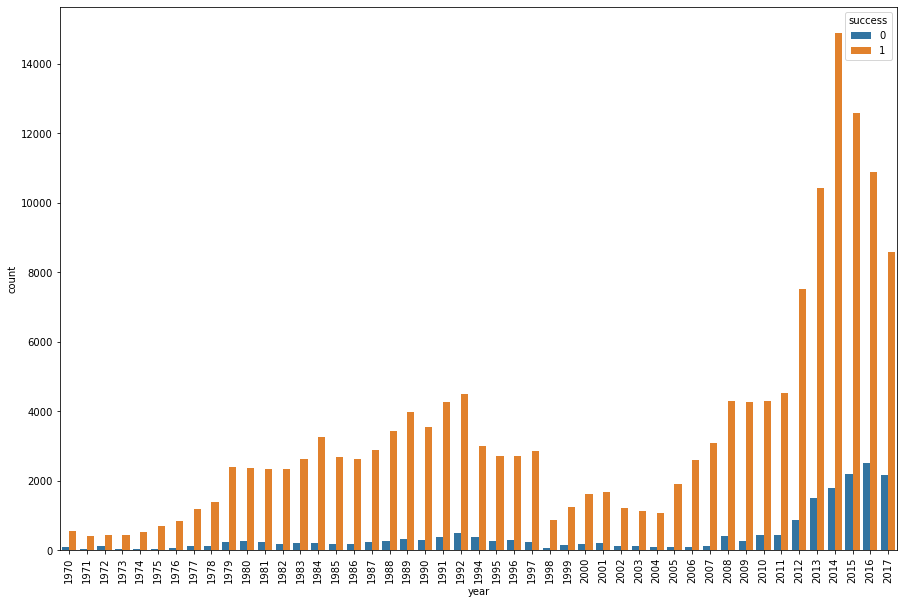

In [22]:
plt.figure(figsize=[15,10])
sns.countplot('year',data=data,hue='success')
plt.xticks(rotation=90)
plt.show()

* 2014 is the year with highest attacks

### Bucketing years into decades.

In [23]:
#Decade wise analysis.
data[['year','decade']].sample(10)

,year,decade
7024,1978,1970-1980
168765,2016,2010-2017
60870,1995,1990-2000
175836,2017,2010-2017
110559,2012,2010-2017
2579,1974,1970-1980
83034,2007,2000-2010
17657,1982,1980-1990
109798,2012,2010-2017
170188,2016,2010-2017


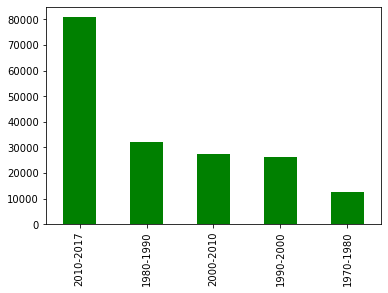

In [24]:
# Decade with higher attacks.
decade = data['decade'].value_counts()
decade.plot.bar(color='green');

* Most of the attacks were happend in the recent years 2010-2017

### Number of terrorist attacks in region wise

In [25]:
#no of terrorist attacks in region wise
region_count=data['region'].value_counts()
regions=data['region'].value_counts().index
px.bar(data,x=regions,y=region_count, barmode='group',title='No of terrorist attacks in regions.')

* Middle East & North Africa has the highest number attacks than other regions

### Top 10 Countries that are mostly attacked by terrorists.

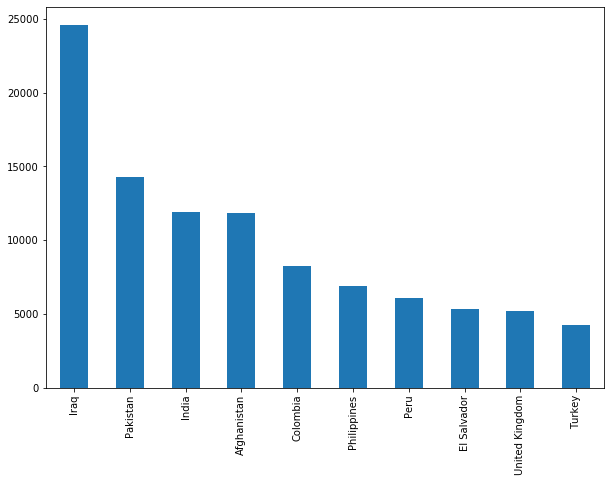

In [26]:
# Country with most number of attacks.
plt.figure(figsize=[10,7])
country = data['country'].value_counts()[:10]
country.plot.bar();

* Iraq is the country with highest record in terrorism activities

### Weapons used by terrorists

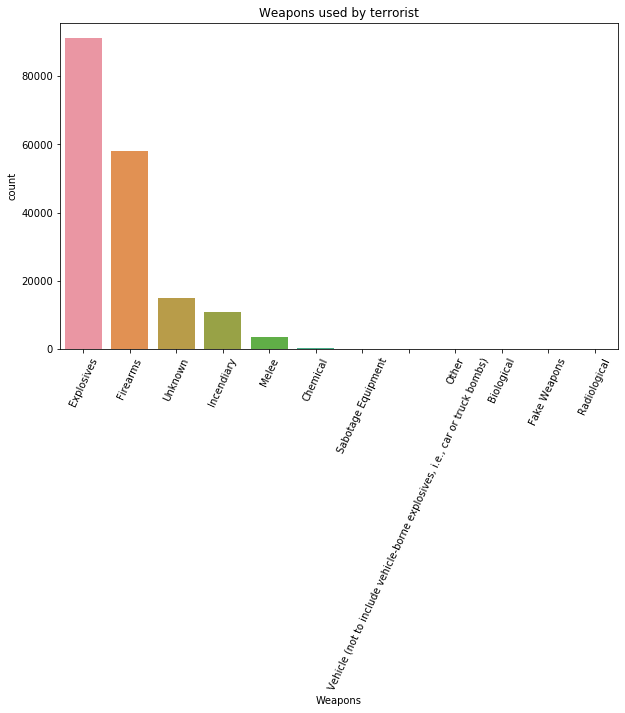

In [27]:
plt.figure(figsize=[10,6])
sns.countplot('weapon',data=data,order=data['weapon'].value_counts().index)
plt.xticks(rotation=65)
plt.xlabel('Weapons')
plt.title('Weapons used by terrorist')
plt.show()


* Most used wepons of terrorist is Explosives

###  Target of terrorists

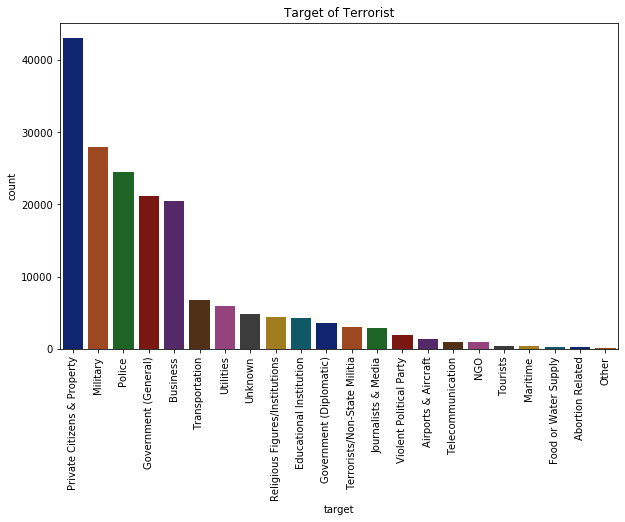

In [28]:
plt.figure(figsize=[10,6])
sns.countplot('target',data=data,palette='dark',order=data['target'].value_counts().index)
plt.xticks(rotation=90)
plt.xlabel('target')
plt.title('Target of Terrorist')
plt.show()

* Private Citizens & Property are the main target of terrorists.

### Success rate of attacks 

In [29]:
success= data['success'].value_counts()
success

1    159869
0     19414
Name: success, dtype: int64

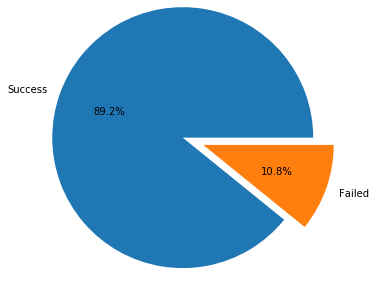

In [30]:
plt.figure(figsize=(5,5))
plt.pie(success,labels=['Success','Failed'],explode = (0.20, 0),autopct='%1.1f%%',radius=1.2);

* 89% of attacks were successfull where remaining 11% got failed.

# Conclusion and Results :

## Terrorism in India
* Total number of Terrorsim attacks in India is 11934
* <b>West Bengal</b> is the state with <b>maximum</b> number of terrorsim attacks in India.
* <b>Andhra Pradesh</b> is the state with <b>minimum</b> number of terrorsim attacks in India.
* <b>19,232</b> people were <b>killed</b> in India

## Terrorism in World
* Highest number of the attacks were happend in the year <b>2014</b>
* Most of the attacks are happening in recent decade <b>2010-2017</b>
* <b>Middle East & North Africa</b> has the highest number attacks than other regions.
* <b>Iraq</b> is the country with highest record in terrorism activities.
* <b>Explosives</b> are the most used wepons by terrorists.
* <b>Private Citizens & Property</b> are the main target of terrorists.
* <b>89%</b> of attacks were successfull where remaining <b>11%</b> got failed.